# Wood & Poole Data Analysis
This data is aquired from US Census
Data in this overview is from 2022.
The forcast represents varieus  attributes.



In [1]:
# Import libraries
import pandas as pd
import os


In [2]:
# Create an empty master DataFrame
master_df = pd.DataFrame()

# Define the directory where your CSV files are located
csv_directory = "L:/Belachew/lab/P/WoodAndPool/2023/Demographic/SPC"

# Get a list of CSV files in the directory
csv_files = [filename for filename in os.listdir(csv_directory) if filename.endswith(".CSV")]

# Check if any CSV files are present
if not csv_files:
    print("No CSV files found in the specified directory.")
else:
    # Iterate through each CSV file in the directory
    for filename in csv_files:
        file_path = os.path.join(csv_directory, filename)

        # Load the CSV file into a DataFrame and skip the first two rows and last 36 rows
        df = pd.read_csv(file_path, skiprows=[0, 1], skipfooter=36, engine='python')

        # Transpose the DataFrame and use the second row as the column names
        df = df.T
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header

        # Add a new column called "county name" and replace first 3 characters with blank
        county_Code = os.path.splitext(filename)[0]
        df["FIPSCode"] = county_Code[3:]
        #df["FIPSCode"] = df["FIPSCode"].astype(str)
        # Replace the Insex with"Year" as column name
        df.index.names = ['Year']
        
        # Replace the n.a. with black
        df = df.replace('n.a.',"")      
        

       
       
        # Append the DataFrame to the master DataFrame
        master_df = master_df.append(df, ignore_index=False)
        

        # Merge (join) the "master_df" with the "county list" DataFrame based on "FIPSCode"
#county_list_file = "L:/Belachew/lab/P/WoodAndPool/2022/Demographic/SPC/PA_FIPSCODE.xlsx"  # Replace with the actual path to your county list file
#county_list_df = pd.read_excel(county_list_file)
#master_df = master_df.merge(county_list_df, on="FIPSCode", how="left")



# Convert the "FIPSCode" column to string in both DataFrames
#master_df["FIPSCode"] = master_df["FIPSCode"].astype(str)

# Merge (join) the "master_df" with the "county list" DataFrame based on "FIPSCode"
county_list_file = "L:/Belachew/lab/P/WoodAndPool/2023/Demographic/SPC/PA_FIPSCODE.xlsx"  # Replace with the actual path to your county list file
county_list_df = pd.read_excel(county_list_file)
county_list_df["FIPSCode"] = county_list_df["FIPSCode"].astype(str)

master_df.reset_index(inplace=True)
master_df = pd.merge(master_df, county_list_df, on="FIPSCode", how="left")

# Print the master DataFrame (for debugging purposes)
# print(master_df)

C:\Users\ayele\AppData\Local\Temp\ipykernel_14416\940581272.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=False)
C:\Users\ayele\AppData\Local\Temp\ipykernel_14416\940581272.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=False)
C:\Users\ayele\AppData\Local\Temp\ipykernel_14416\940581272.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=False)
C:\Users\ayele\AppData\Local\Temp\ipykernel_14416\940581272.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, 

In [10]:
# Export the master DataFrame to Excel
output_excel_file = "L:/Belachew/lab/P/WoodAndPool/2023/Demographic/SPC/master_dataframe.xlsx"
master_df.to_excel(output_excel_file, index=True)

In [3]:
# view
df.head(5)

,"TOTAL POPULATION, ALL AGES (in thousands)",TOTAL POPULATION AGE UNDER 5 YEARS (in thousands),TOTAL POPULATION AGE UNDER 1 YEAR (in thousands),TOTAL POPULATION AGE 1 YEAR (in thousands),TOTAL POPULATION AGE 2 YEARS (in thousands),TOTAL POPULATION AGE 3 YEARS (in thousands),TOTAL POPULATION AGE 4 YEARS (in thousands),TOTAL POPULATION AGE 5 to 9 YEARS (in thousands),TOTAL POPULATION AGE 5 YEARS (in thousands),TOTAL POPULATION AGE 6 YEARS (in thousands),...,HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 79 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 to 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 81 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 82 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 83 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 85 YEARS and OVER (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE MEDIAN AGE (in years),FIPSCode
Year,,,,,,,,,,,,,,,,,,,,,
1969,374.580,,,,,,,,,,...,,,,,,,,,,42129
1970,377.482,29.772,5.562,5.784,5.791,6.156,6.479,35.172,6.790,6.891,...,,,,,,,,,,42129
1971,379.856,29.465,5.619,5.865,5.790,5.936,6.255,33.969,6.335,6.553,...,,,,,,,,,,42129
1972,382.048,28.838,5.079,5.893,5.873,5.946,6.047,32.818,6.138,6.152,...,,,,,,,,,,42129
1973,382.574,27.933,4.729,5.274,5.877,6.011,6.042,31.523,5.919,5.965,...,,,,,,,,,,42129


In [4]:
# View 

master_df.head(5)

,Year,"TOTAL POPULATION, ALL AGES (in thousands)",TOTAL POPULATION AGE UNDER 5 YEARS (in thousands),TOTAL POPULATION AGE UNDER 1 YEAR (in thousands),TOTAL POPULATION AGE 1 YEAR (in thousands),TOTAL POPULATION AGE 2 YEARS (in thousands),TOTAL POPULATION AGE 3 YEARS (in thousands),TOTAL POPULATION AGE 4 YEARS (in thousands),TOTAL POPULATION AGE 5 to 9 YEARS (in thousands),TOTAL POPULATION AGE 5 YEARS (in thousands),...,HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 to 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 81 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 82 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 83 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 85 YEARS and OVER (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE MEDIAN AGE (in years),FIPSCode,CountyName
0,1969,1606.592,,,,,,,,,...,,,,,,,,,42003,Allegheny
1,1970,1602.663,115.661,22.580,22.774,22.121,23.479,24.707,140.275,26.125,...,,,,,,,,,42003,Allegheny
2,1971,1593.741,113.216,22.637,22.756,21.913,22.389,23.521,133.582,24.117,...,,,,,,,,,42003,Allegheny
3,1972,1573.661,108.775,20.167,22.495,21.812,21.999,22.302,126.125,22.832,...,,,,,,,,,42003,Allegheny
4,1973,1549.171,103.537,18.496,19.825,21.551,21.796,21.869,118.462,21.608,...,,,,,,,,,42003,Allegheny


# Plot the data into Graphs

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#sns.lineplot(All_data = All_data, x = 'Year', y = 'TOTAL POPULATION, ALL AGES (in thousands)', hue = 'CountyName')
#lt.show()

sns.set_style('darkgrid')

In [6]:
#All_data = # Read Back the excel files
All_data= pd.read_excel("L:/Belachew/lab/P/WoodAndPool/2023/Demographic/SPC/master_dataframe.xlsx", index_col=None, na_values = ['NaN', ''])

In [8]:
All_data

,Unnamed: 0,Year,"TOTAL POPULATION, ALL AGES (in thousands)",TOTAL POPULATION AGE UNDER 5 YEARS (in thousands),TOTAL POPULATION AGE UNDER 1 YEAR (in thousands),TOTAL POPULATION AGE 1 YEAR (in thousands),TOTAL POPULATION AGE 2 YEARS (in thousands),TOTAL POPULATION AGE 3 YEARS (in thousands),TOTAL POPULATION AGE 4 YEARS (in thousands),TOTAL POPULATION AGE 5 to 9 YEARS (in thousands),...,HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 to 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 80 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 81 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 82 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 83 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 84 YEARS (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE AGE 85 YEARS and OVER (in thousands),HISPANIC or LATINO FEMALE POPULATION of ANY RACE MEDIAN AGE (in years),FIPSCode,CountyName
0,0,1969,1606.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003,Allegheny
1,1,1970,1602.663,115.661,22.580,22.774,22.121,23.479,24.707,140.275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003,Allegheny
2,2,1971,1593.741,113.216,22.637,22.756,21.913,22.389,23.521,133.582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003,Allegheny
3,3,1972,1573.661,108.775,20.167,22.495,21.812,21.999,22.302,126.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003,Allegheny
4,4,1973,1549.171,103.537,18.496,19.825,21.551,21.796,21.869,118.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003,Allegheny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,2056,332.446,14.158,2.749,2.793,2.832,2.869,2.915,15.138,...,0.157,0.029,0.037,0.021,0.031,0.039,0.128,37.54,42129,Westmoreland
916,916,2057,331.976,14.167,2.755,2.796,2.837,2.869,2.910,15.143,...,0.156,0.036,0.030,0.037,0.022,0.031,0.130,37.35,42129,Westmoreland
917,917,2058,331.548,14.183,2.756,2.803,2.839,2.872,2.913,15.140,...,0.168,0.043,0.037,0.030,0.037,0.021,0.131,37.47,42129,Westmoreland
918,918,2059,331.165,14.192,2.752,2.804,2.847,2.875,2.914,15.141,...,0.178,0.030,0.044,0.037,0.030,0.037,0.132,37.62,42129,Westmoreland


In [9]:
All_data[['  TOTAL POPULATION AGE 85 YEARS and OVER (in thousands)']]

,TOTAL POPULATION AGE 85 YEARS and OVER (in thousands)
0,NaN
1,11.732
2,12.053
3,12.309
4,12.617
...,...
915,35.653
916,35.528
917,35.194
918,34.841


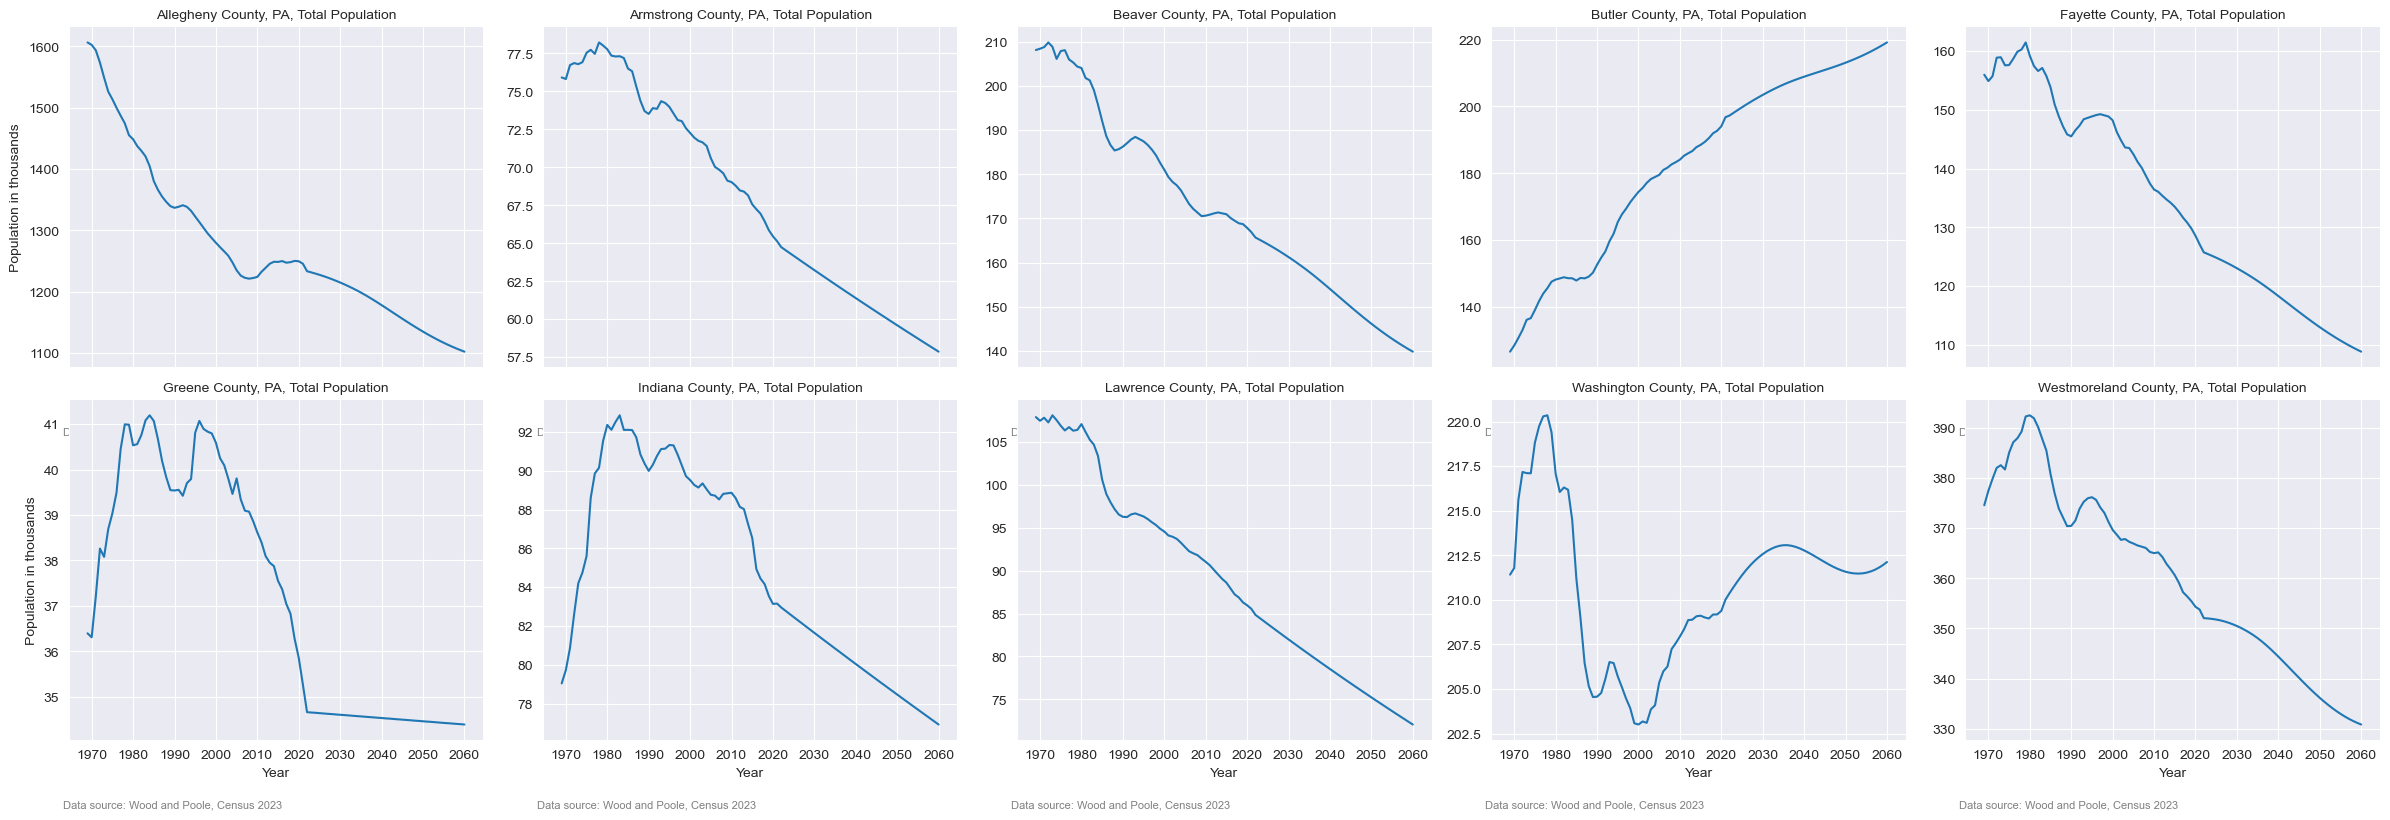

In [10]:
g = sns.FacetGrid(All_data, col='CountyName', col_wrap=5, sharey = False, height=4, aspect=1.2) #, ylim = (50, 1700), )
g.map_dataframe(sns.lineplot, x='Year', y= 'TOTAL POPULATION, ALL AGES (in thousands)')
g.set_axis_labels('Year', 'Population in thousands')
g.set_titles (col_template = '{col_name} County, PA, Total Population')

# New code to add a source to each facet grid
footnote_text = "Data source: Wood and Poole, Census 2023"

for ax in g.axes.flat:
    ax.text(0.25, -0.2, footnote_text, transform=ax.transAxes, ha="center", fontsize=8, color='gray')
    
    
    # Set x-axis tick interval to 10 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

#plt.savefig('1.Total Population_Wood&Poole2023.png', dpi=300, bbox_inches='tight')
plt.show()

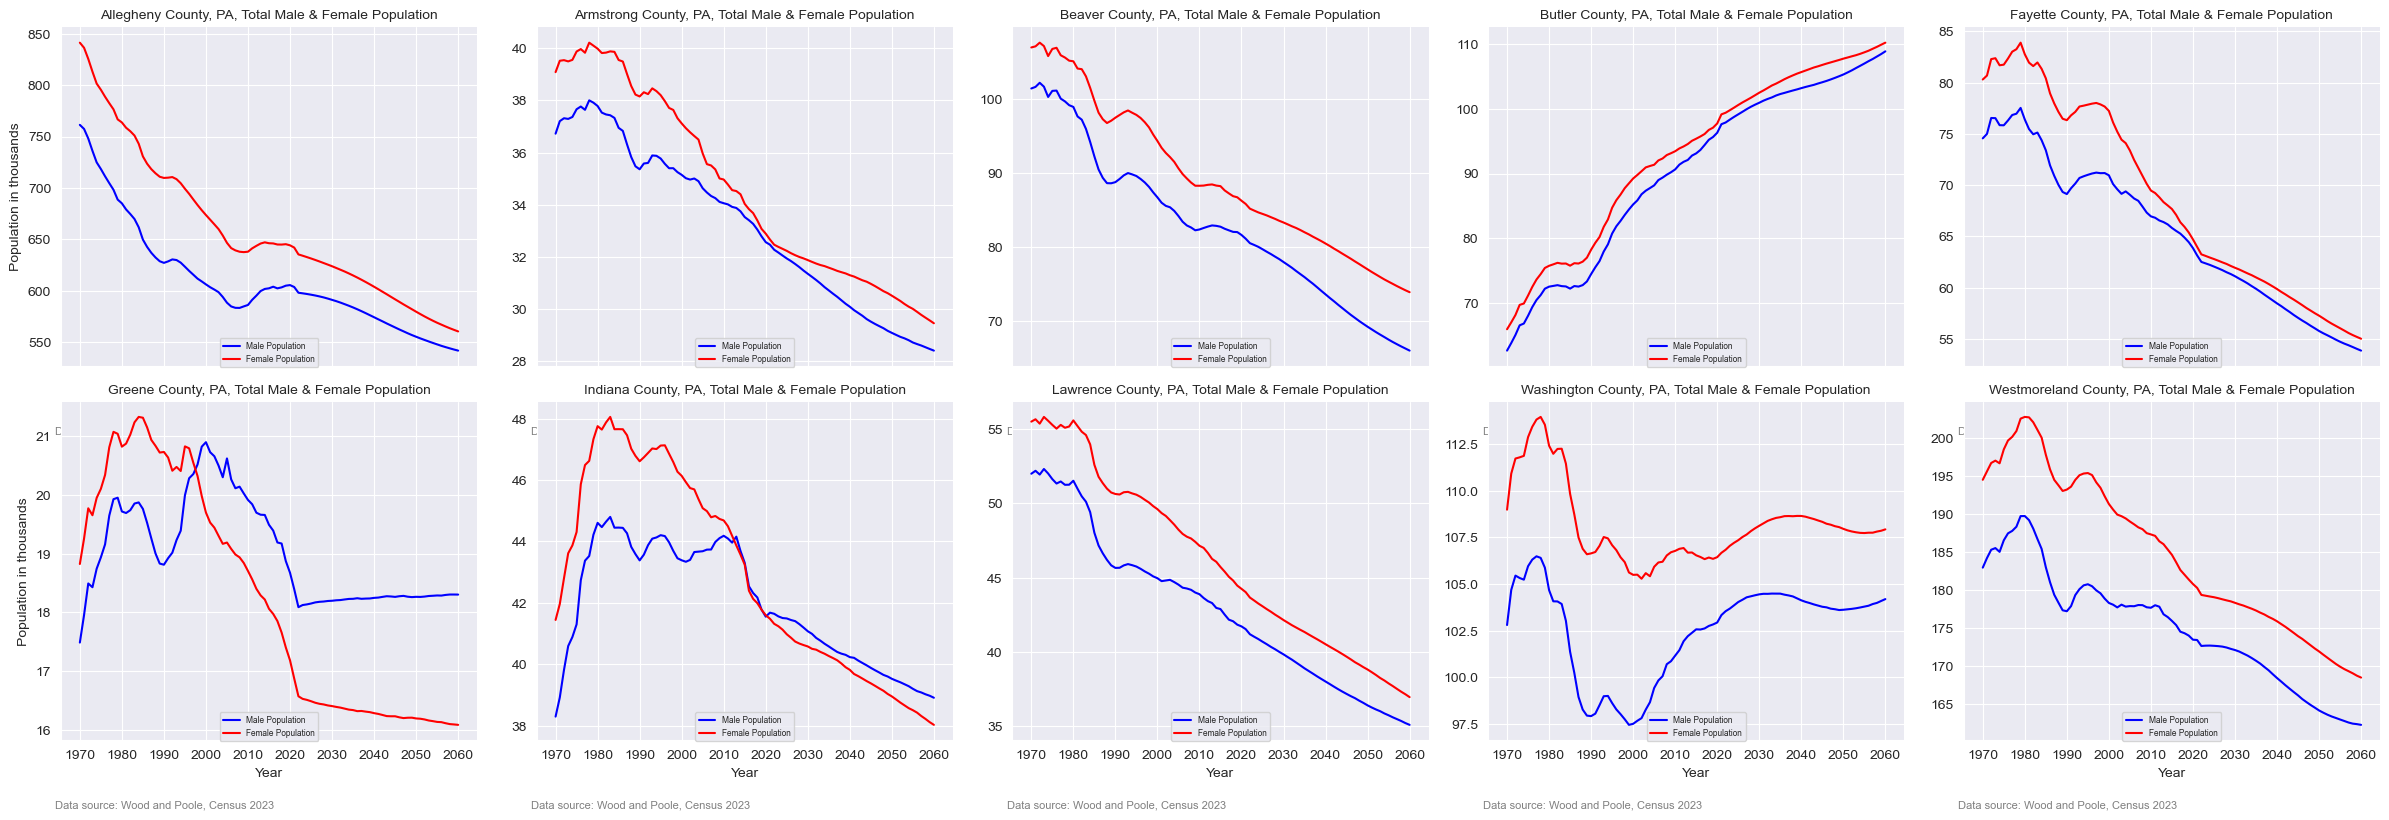

In [12]:
# Plot male and female together

g = sns.FacetGrid(All_data, col='CountyName', col_wrap=5, sharey = False, height=4, aspect=1.2) #, ylim = (50, 1700), )
g.map_dataframe(sns.lineplot, x='Year', y= 'TOTAL MALE POPULATION, ALL AGES (in thousands)',color='blue', label='Male Population')
g.map_dataframe(sns.lineplot, x='Year', y= 'TOTAL FEMALE POPULATION, ALL AGES (in thousands)',color='red', label='Female Population')
g.set_axis_labels('Year', 'Population in thousands')
g.set_titles (col_template = '{col_name} County, PA, Total Male & Female Population')

# New code to add a source to each facet grid
footnote_text = "Data source: Wood and Poole, Census 2023"

for ax in g.axes.flat:
    ax.text(0.25, -0.2, footnote_text, transform=ax.transAxes, ha="center", fontsize=8, color='gray')
    
    
  


  # Set x-axis tick interval to 10 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    
    # Add a legend to the current facet in the bottom middle
    ax.legend(loc='lower center', fontsize=6)

    # Move the legend to the desired position
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((0.5, -0.015))  # Adjust the second value to control the vertical position




#plt.savefig('4. Total Male and Female Population_Wood&Poole2023.png', dpi=300, bbox_inches='tight')
plt.show()


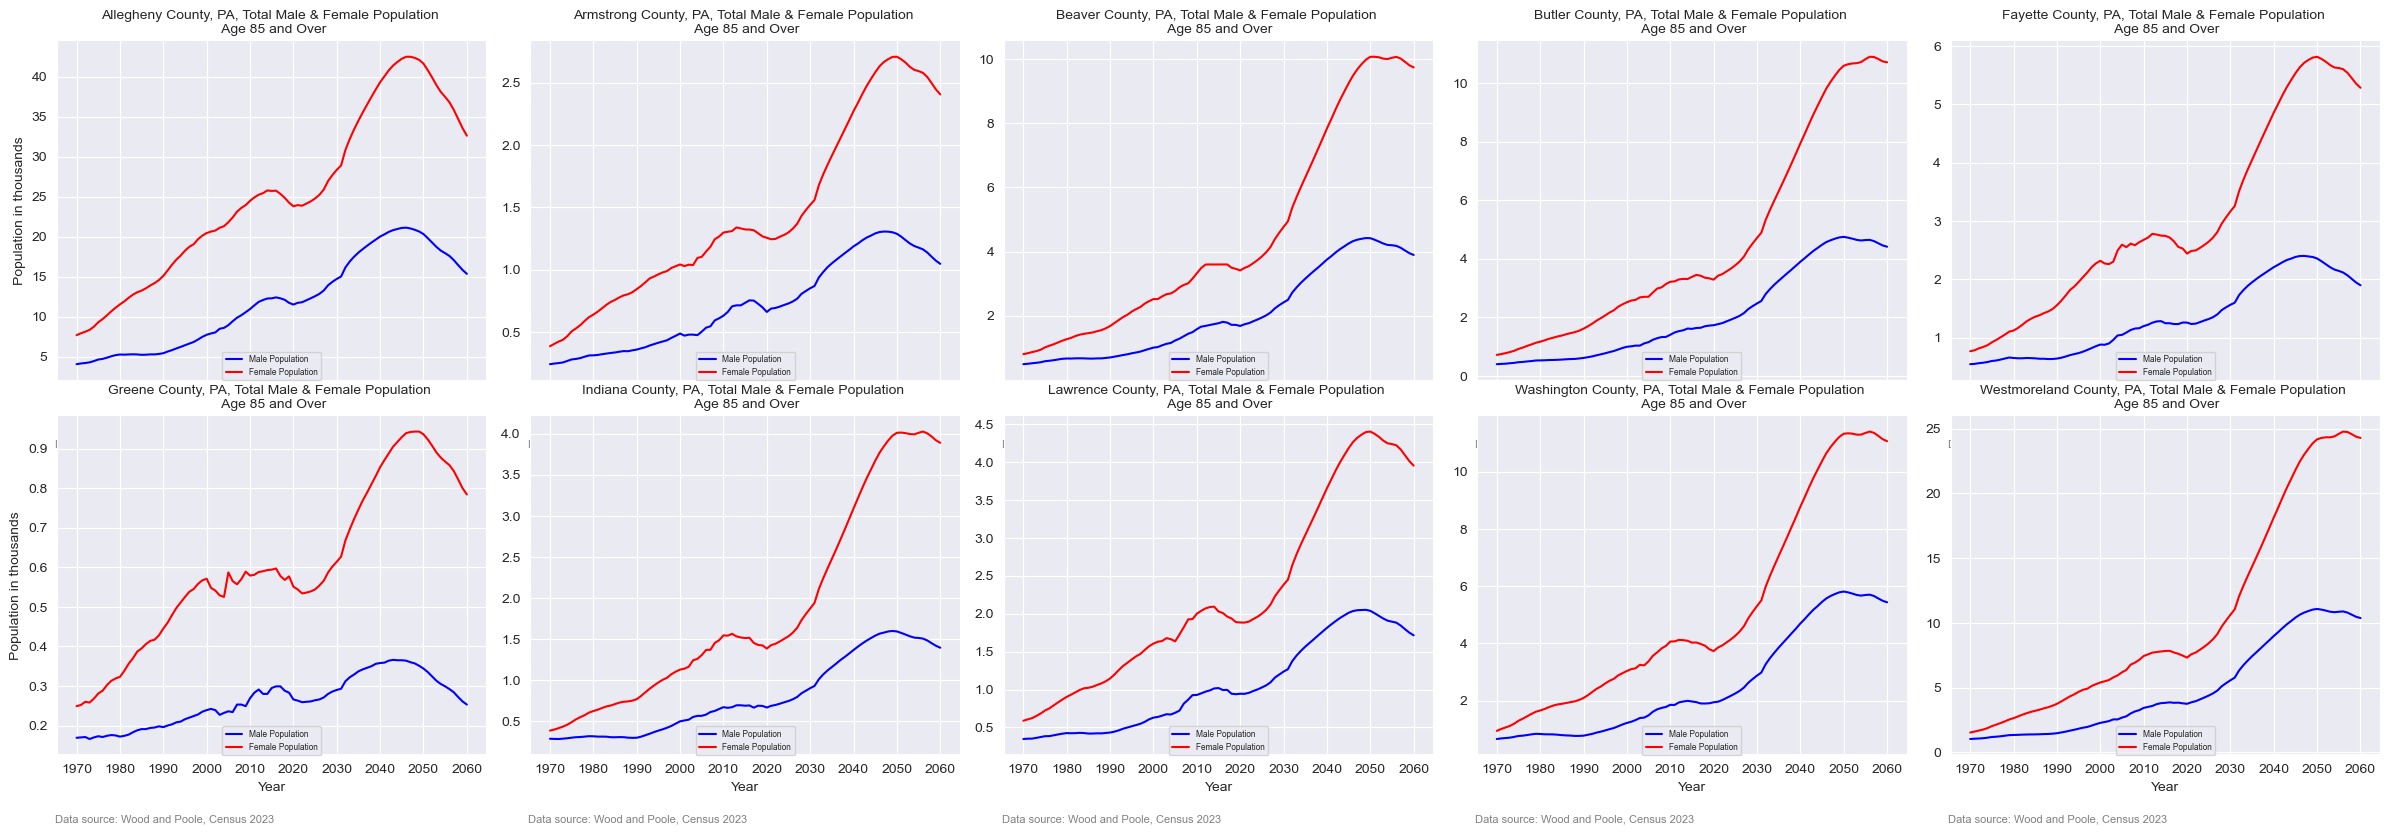

In [11]:
# Plot male and female together  age 85 and over

g = sns.FacetGrid(All_data, col='CountyName', col_wrap=5, sharey = False, height=4, aspect=1.2) #, ylim = (50, 1700), )
g.map_dataframe(sns.lineplot, x='Year', y= '  TOTAL MALE POPULATION AGE 85 YEARS and OVER (in thousands)',color='blue', label='Male Population')
g.map_dataframe(sns.lineplot, x='Year', y= '  TOTAL FEMALE POPULATION AGE 85 YEARS and OVER (in thousands)',color='red', label='Female Population')
g.set_axis_labels('Year', 'Population in thousands')
g.set_titles (col_template = '{col_name} County, PA, Total Male & Female Population \n Age 85 and Over')

# New code to add a source to each facet grid
footnote_text = "Data source: Wood and Poole, Census 2023"

for ax in g.axes.flat:
    ax.text(0.25, -0.2, footnote_text, transform=ax.transAxes, ha="center", fontsize=8, color='gray')
    
    
  


  # Set x-axis tick interval to 10 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    
    # Add a legend to the current facet in the bottom middle
    ax.legend(loc='lower center', fontsize=6)

    # Move the legend to the desired position
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((0.5, -0.015))  # Adjust the second value to control the vertical position




#plt.savefig('5. Total Male and Female Population Age 85 and Over_Wood&Poole2023.png', dpi=300, bbox_inches='tight')
plt.show()


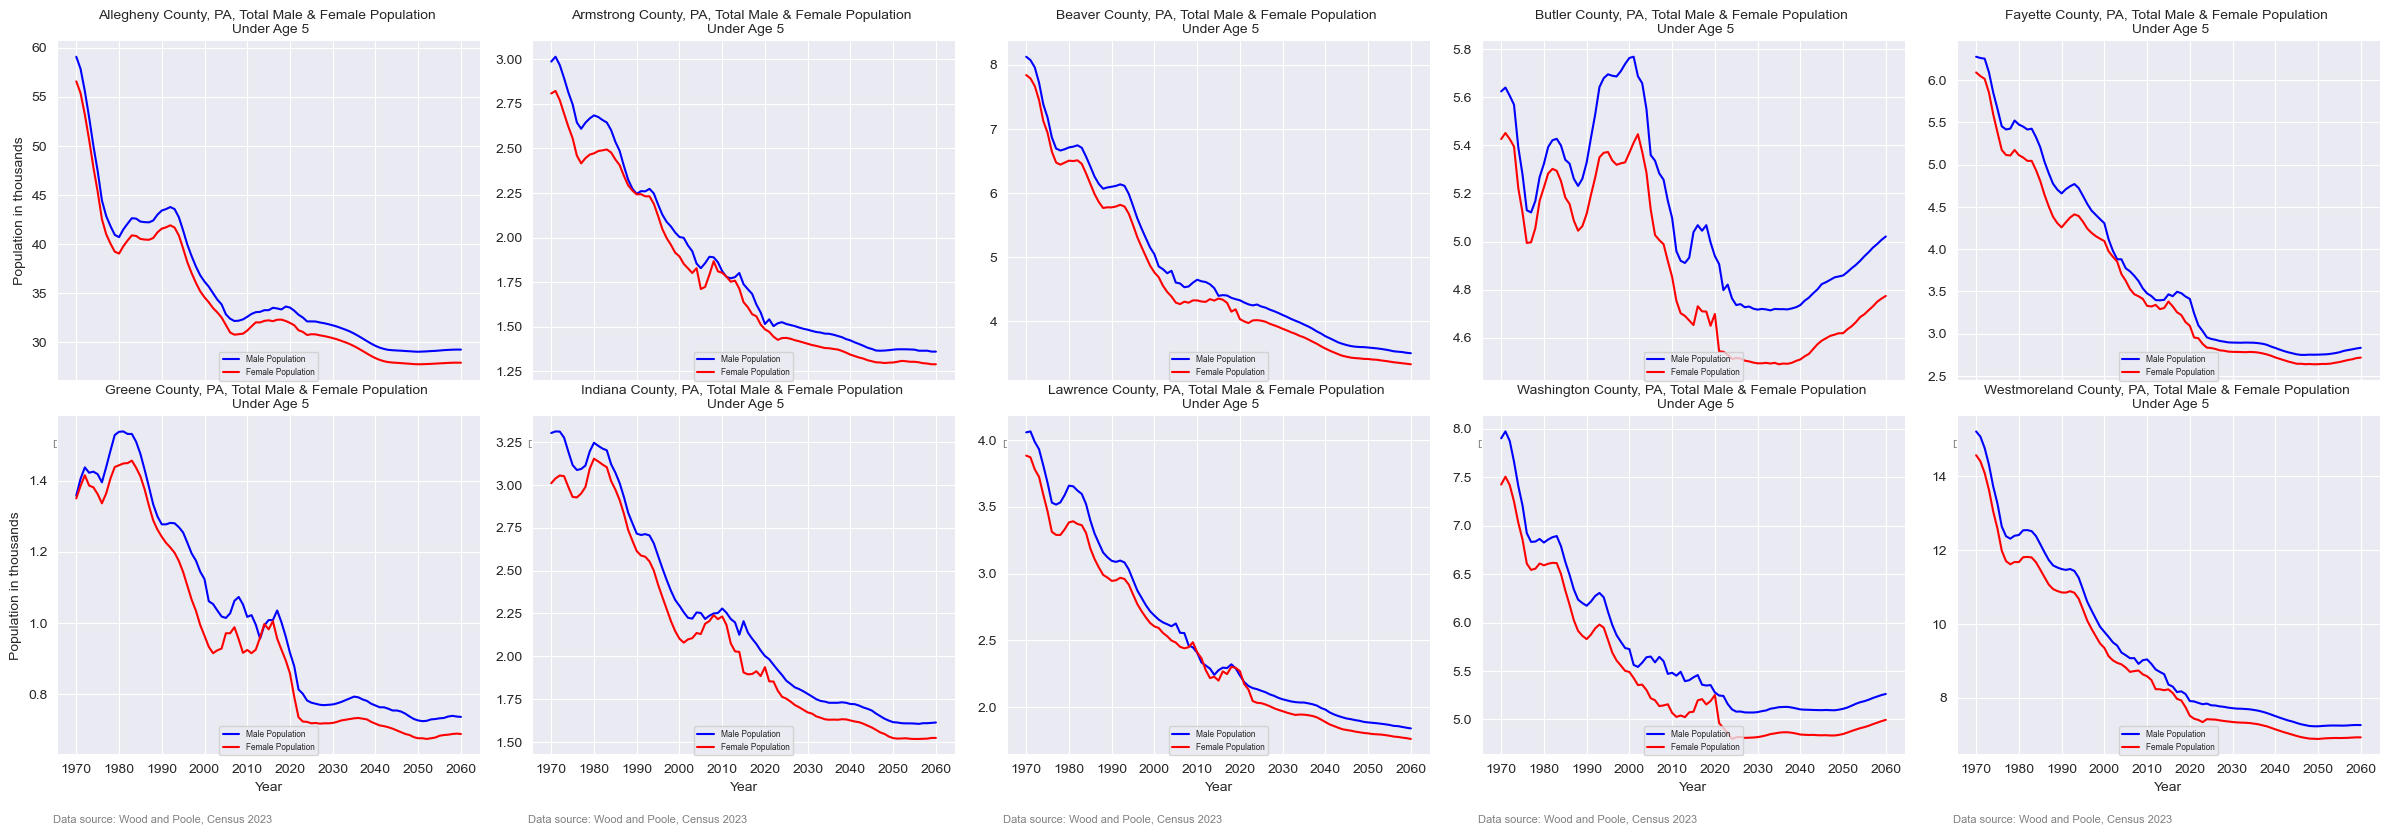

In [13]:
 # Plot male and female together under Age 5

g = sns.FacetGrid(All_data, col='CountyName', col_wrap=5, sharey = False, height=4, aspect=1.2) #, ylim = (50, 1700), )
g.map_dataframe(sns.lineplot, x='Year', y= '  TOTAL MALE POPULATION AGE UNDER 5 YEARS (in thousands)',color='blue', label='Male Population')
g.map_dataframe(sns.lineplot, x='Year', y= '  TOTAL FEMALE POPULATION AGE UNDER 5 YEARS (in thousands)',color='red', label='Female Population')
g.set_axis_labels('Year', 'Population in thousands')
g.set_titles (col_template = '{col_name} County, PA, Total Male & Female Population \n Under Age 5')

# New code to add a source to each facet grid
footnote_text = "Data source: Wood and Poole, Census 2023"

for ax in g.axes.flat:
    ax.text(0.25, -0.2, footnote_text, transform=ax.transAxes, ha="center", fontsize=8, color='gray')
    
    
  


  # Set x-axis tick interval to 10 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    
    # Add a legend to the current facet in the bottom middle
    ax.legend(loc='lower center', fontsize=6)

    # Move the legend to the desired position
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((0.5, -0.015))  # Adjust the second value to control the vertical position




#plt.savefig('6. Total Male and Female Population Under Age 5_Wood&Poole2023.png', dpi=300, bbox_inches='tight')
plt.show()